# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib notebook
import seaborn as sns
import os
import shap
pd.set_option('display.max_columns', 50)
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
print(pd.__version__)
print(np.__version__)
print(sns.__version__)

1.4.2
1.21.5
0.11.2


# Load Dataset

In [3]:
df = pd.read_csv('online_shoppers_intention.csv')
df.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
4920,6,124.86,3,243.00,25,"1,971.19",0.01,0.03,24.90,0.00,May,2,2,5,4,Returning_Visitor,False,True
4330,0,0.00,0,0.00,8,129.00,0.03,0.10,0.00,0.80,May,2,4,1,3,Returning_Visitor,False,False
5886,0,0.00,0,0.00,7,70.40,0.11,0.13,0.00,0.00,Jul,3,2,4,1,Returning_Visitor,False,False
5011,0,0.00,0,0.00,26,"1,380.83",0.00,0.02,0.00,0.00,May,2,6,4,13,Returning_Visitor,False,False
91,0,0.00,0,0.00,1,0.00,0.20,0.20,0.00,0.00,Feb,1,1,1,2,Returning_Visitor,True,False


# EDA

## Descriptive Statistics

In [4]:
#Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
# Mengelompokan kolom per type

categorical = ['Month','OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend','Revenue']
numerical = df.drop(categorical, axis=1).columns

print('Kolom tipe objek:\n', list(categorical),'\n')
print('Kolom tipe numerik:\n', list(numerical))

Kolom tipe objek:
 ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue'] 

Kolom tipe numerik:
 ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']


In [6]:
# Deskripsi statistik kolom type numerik

df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,"12,330.00","12,330.00","12,330.00","12,330.00","12,330.00","12,330.00","12,330.00","12,330.00","12,330.00","12,330.00","12,330.00","12,330.00","12,330.00","12,330.00"
mean,2.32,80.82,0.50,34.47,31.73,"1,194.75",0.02,0.04,5.89,0.06,2.12,2.36,3.15,4.07
std,3.32,176.78,1.27,140.75,44.48,"1,913.67",0.05,0.05,18.57,0.20,0.91,1.72,2.40,4.03
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00
25%,0.00,0.00,0.00,0.00,7.00,184.14,0.00,0.01,0.00,0.00,2.00,2.00,1.00,2.00
50%,1.00,7.50,0.00,0.00,18.00,598.94,0.00,0.03,0.00,0.00,2.00,2.00,3.00,2.00
75%,4.00,93.26,0.00,0.00,38.00,"1,464.16",0.02,0.05,0.00,0.00,3.00,2.00,4.00,4.00
max,27.00,"3,398.75",24.00,"2,549.38",705.00,"63,973.52",0.20,0.20,361.76,1.00,8.00,13.00,9.00,20.00


In [7]:
# Deskripsi statistik kolom type numerik

df[categorical].describe()

,OperatingSystems,Browser,Region,TrafficType
count,"12,330.00","12,330.00","12,330.00","12,330.00"
mean,2.12,2.36,3.15,4.07
std,0.91,1.72,2.40,4.03
min,1.00,1.00,1.00,1.00
25%,2.00,2.00,1.00,2.00
50%,2.00,2.00,3.00,2.00
75%,3.00,2.00,4.00,4.00
max,8.00,13.00,9.00,20.00


In [8]:
df[['Month','VisitorType','Weekend','Revenue']].describe()

,Month,VisitorType,Weekend,Revenue
count,12330,12330,12330,12330
unique,10,3,2,2
top,May,Returning_Visitor,False,False
freq,3364,10551,9462,10422


In [9]:
# Cek missing value

df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [10]:
# cek duplikat

df.duplicated(keep=False).sum()

201

In [11]:
df[df.duplicated(keep=False)]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
85,0,0.00,0,0.00,1,0.00,0.20,0.20,0.00,0.00,Feb,1,1,1,3,Returning_Visitor,False,False
132,0,0.00,0,0.00,1,0.00,0.20,0.20,0.00,0.00,Feb,3,2,3,3,Returning_Visitor,False,False
158,0,0.00,0,0.00,1,0.00,0.20,0.20,0.00,0.00,Feb,1,1,1,3,Returning_Visitor,False,False
159,0,0.00,0,0.00,1,0.00,0.20,0.20,0.00,0.00,Feb,3,2,3,3,Returning_Visitor,False,False
178,0,0.00,0,0.00,1,0.00,0.20,0.20,0.00,0.00,Feb,3,2,3,3,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11934,0,0.00,0,0.00,1,0.00,0.20,0.20,0.00,0.00,Dec,1,1,1,2,New_Visitor,False,False
11938,0,0.00,0,0.00,1,0.00,0.20,0.20,0.00,0.00,Dec,1,1,4,1,Returning_Visitor,True,False
12159,0,0.00,0,0.00,1,0.00,0.20,0.20,0.00,0.00,Dec,1,1,1,3,Returning_Visitor,False,False
12180,0,0.00,0,0.00,1,0.00,0.20,0.20,0.00,0.00,Dec,1,13,9,20,Returning_Visitor,False,False


In [12]:
# Frekuensi nilai tiap kolom tipe numerik

for i in numerical:
    print('Frekuensi nilai kolom',i,':\n', df[i].value_counts(),'\n')

Frekuensi nilai kolom Administrative :
 0     5768
1     1354
2     1114
3      915
4      765
5      575
6      432
7      338
8      287
9      225
10     153
11     105
12      86
13      56
14      44
15      38
16      24
17      16
18      12
19       6
24       4
22       4
23       3
21       2
20       2
27       1
26       1
Name: Administrative, dtype: int64 

Frekuensi nilai kolom Administrative_Duration :
 0.00      5903
4.00        56
5.00        53
7.00        45
11.00       42
          ... 
68.01        1
362.30       1
90.70        1
760.90       1
150.36       1
Name: Administrative_Duration, Length: 3335, dtype: int64 

Frekuensi nilai kolom Informational :
 0     9699
1     1041
2      728
3      380
4      222
5       99
6       78
7       36
9       15
8       14
10       7
12       5
14       2
16       1
11       1
24       1
13       1
Name: Informational, dtype: int64 

Frekuensi nilai kolom Informational_Duration :
 0.00      9925
9.00        33
7.00        

In [13]:
# Frekuensi nilai tiap kolom tipe kategori

for i in categorical:
    print('Frekuensi nilai kolom',i,':\n', df[i].value_counts(),'\n')
    

Frekuensi nilai kolom Month :
 May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64 

Frekuensi nilai kolom OperatingSystems :
 2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64 

Frekuensi nilai kolom Browser :
 2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64 

Frekuensi nilai kolom Region :
 1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64 

Frekuensi nilai kolom TrafficType :
 2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64 

Fr

In [14]:
# nilai unik tiap kolom tipe numerik

for i in numerical:
    print('Nilai unik nilai kolom',i,':\n', df[i].unique(),'\n')

Nilai unik nilai kolom Administrative :
 [ 0  1  2  4 12  3 10  6  5  9  8 16 13 11  7 18 14 17 19 15 24 22 21 20
 23 27 26] 

Nilai unik nilai kolom Administrative_Duration :
 [  0.         53.         64.6       ... 167.9107143 305.125
 150.3571429] 

Nilai unik nilai kolom Informational :
 [ 0  1  2  4 16  5  3 14  6 12  7  9 10  8 11 24 13] 

Nilai unik nilai kolom Informational_Duration :
 [  0.   120.    16.   ... 547.75 368.25 211.25] 

Nilai unik nilai kolom ProductRelated :
 [  1   2  10  19   0   3  16   7   6  23  13  20   8   5  32   4  45  14
  52   9  46  15  22  11  12  36  42  27  90  18  38  17 128  25  30  21
  51  26  28  31  24  50  96  49  68  98  67  55  35  37  29  34  71  63
  87  40  33  54  64  75  39 111  81  61  47  44  88 149  41  79  66  43
 258  80  62  83 173  48  58  57  56  69  82  59 109 287  53  84  78 137
 113  89  65  60 104 129  77  74  93  76  72 194 140 110 132 115  73 328
 160  86 150  95 130 151 117 124 127 125 116 105  92 157 154 220 187 112


In [15]:
# nilai unik tiap kolom tipe kategori

for i in categorical:
    print('Nilai unik nilai kolom',i,':\n', df[i].unique(),'\n')

Nilai unik nilai kolom Month :
 ['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec'] 

Nilai unik nilai kolom OperatingSystems :
 [1 2 4 3 7 6 8 5] 

Nilai unik nilai kolom Browser :
 [ 1  2  3  4  5  6  7 10  8  9 12 13 11] 

Nilai unik nilai kolom Region :
 [1 9 2 3 4 5 6 7 8] 

Nilai unik nilai kolom TrafficType :
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 18 19 16 17 20] 

Nilai unik nilai kolom VisitorType :
 ['Returning_Visitor' 'New_Visitor' 'Other'] 

Nilai unik nilai kolom Weekend :
 [False  True] 

Nilai unik nilai kolom Revenue :
 [False  True] 



## Univariate Analysis

In [16]:
df[numerical].columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'],
      dtype='object')

In [17]:
df[categorical].columns

Index(['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType',
       'VisitorType', 'Weekend', 'Revenue'],
      dtype='object')

In [18]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


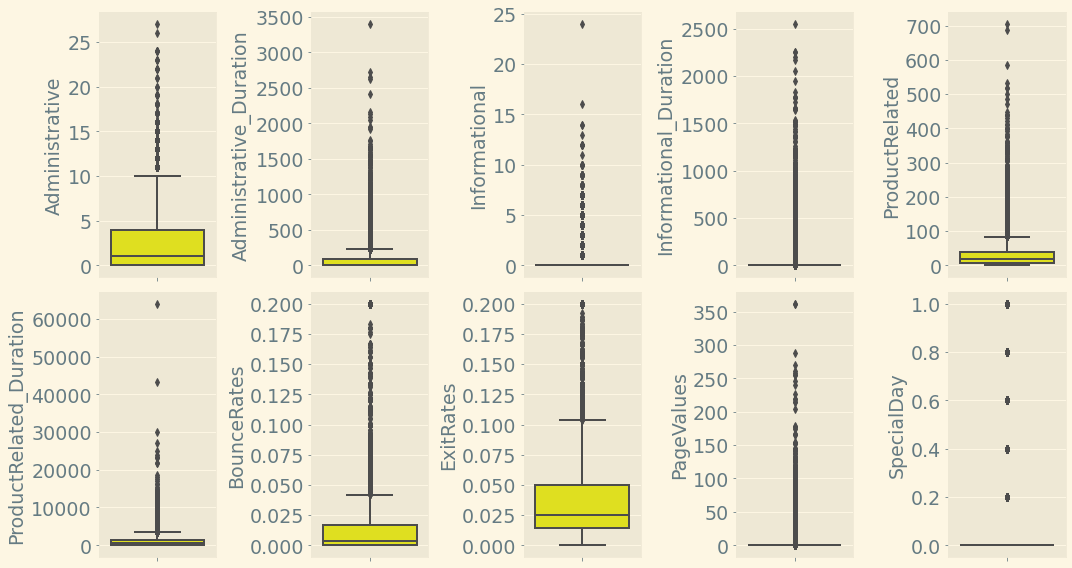

In [19]:
# Kolom numerical

plt.style.use('Solarize_Light2')
plt.figure(figsize=(15,8))
z=numerical
for i in range (0, len(z)):
    plt.subplot(2,5,i+1)
    sns.boxplot(y=df[z[i]], color='yellow',orient='v')
    plt.ylabel(z[i],size=19)
    plt.yticks(size=19)
    plt.tight_layout()

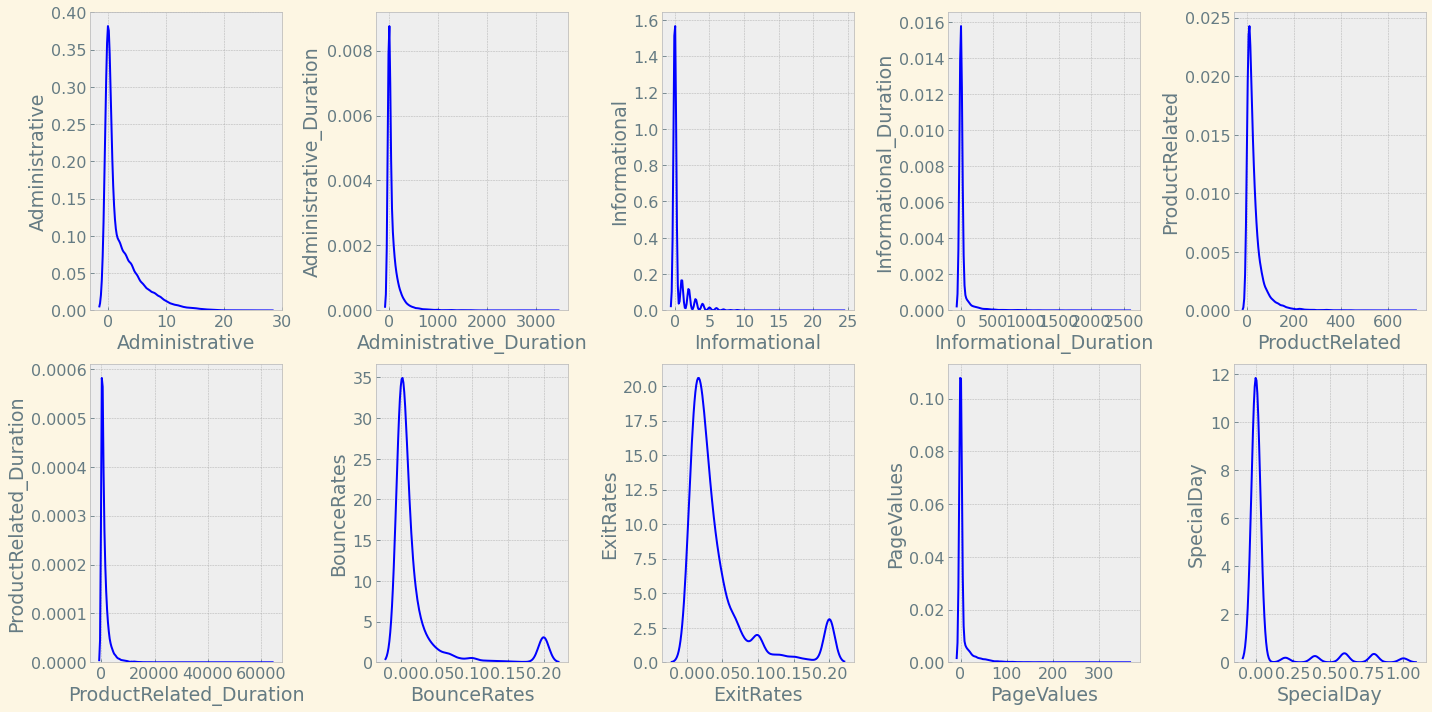

In [20]:
plt.style.use('bmh')
plt.figure(figsize=(20,10))
z=numerical
for i in range (0, len(z)):
    plt.subplot(2,5,i+1)
    sns.kdeplot(x=df[z[i]], color='blue')
    plt.xlabel(z[i],size=19)
    plt.ylabel(z[i], size=19)
    plt.xticks(size=16)
    plt.yticks(size=16)
    plt.tight_layout()

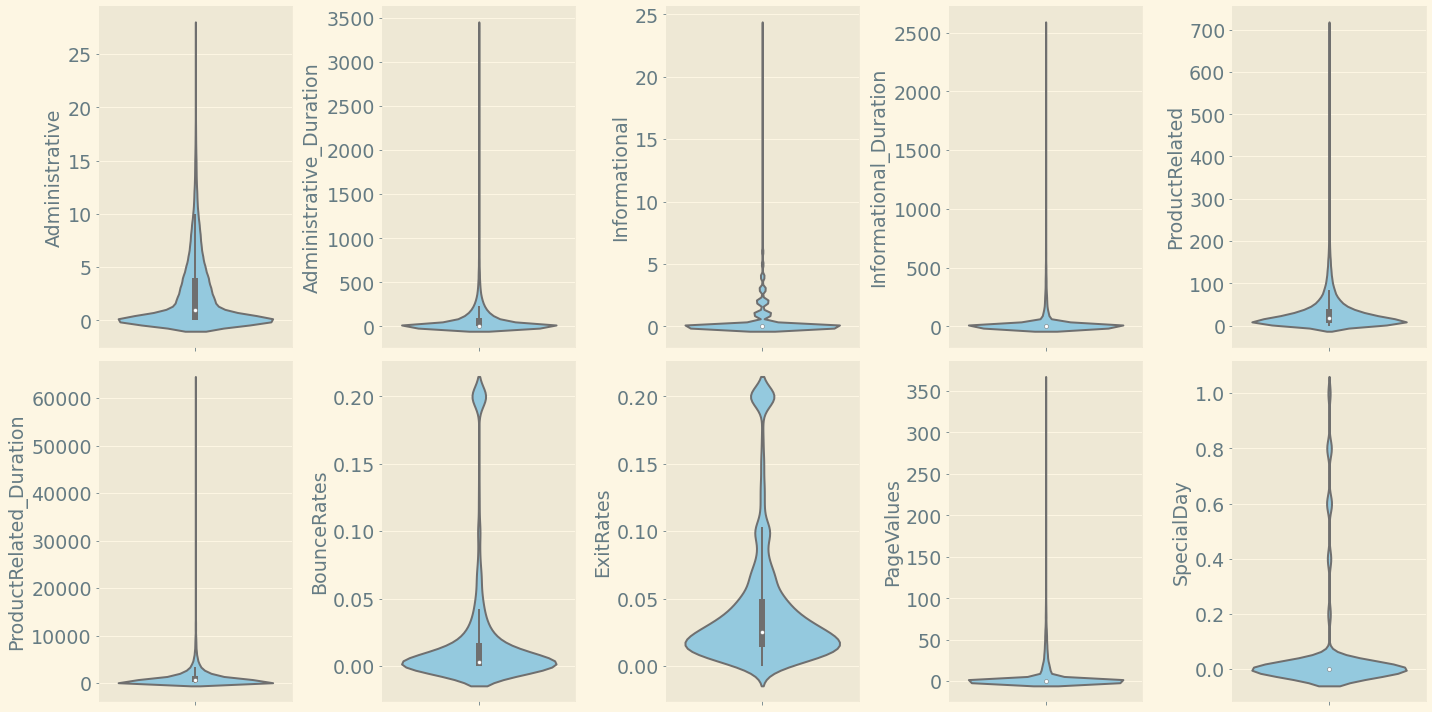

In [21]:
plt.style.use('Solarize_Light2')
plt.figure(figsize=(20,10))
z=numerical
for i in range (0, len(z)):
    plt.subplot(2,5,i+1)
    sns.violinplot(y=df[z[i]], color='skyblue')
    plt.ylabel(z[i],size=19)
    plt.yticks(size=19)
    plt.tight_layout()

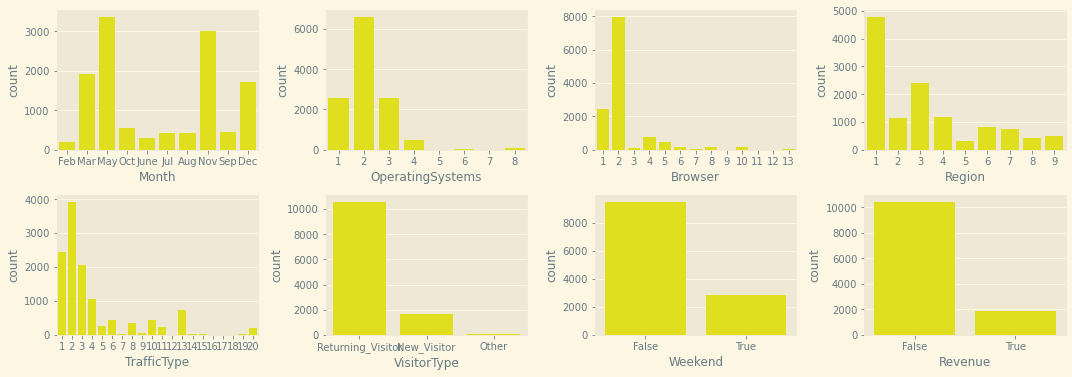

In [22]:
# Kolom categorical

f = categorical
plt.figure(figsize=(15,10))

for i in range(0, len(f)):
    plt.subplot(4,4,i+1)
    sns.countplot(x=df[f[i]], color='yellow')
    plt.tight_layout()

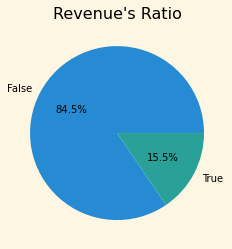

In [23]:
counts = df['Revenue'].value_counts(normalize=True)

plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title("Revenue's Ratio")
plt.show()

## Multivariate Analysis

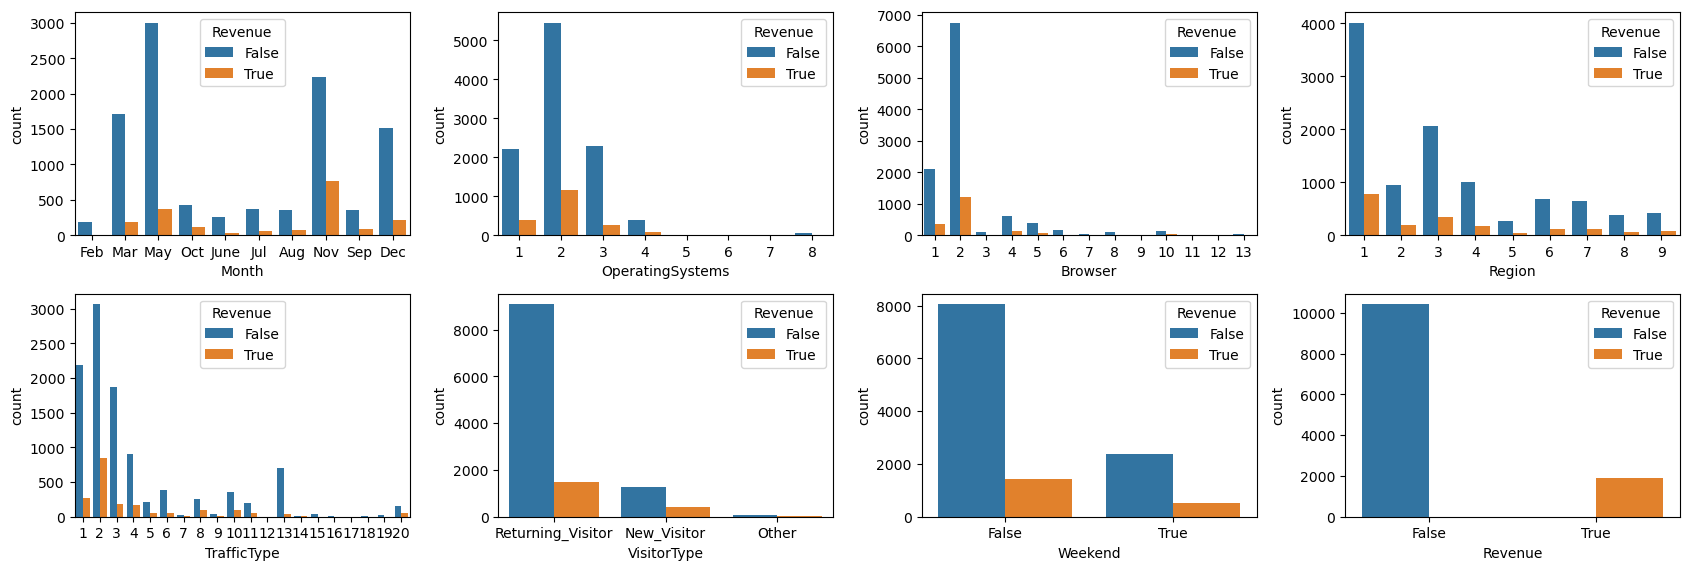

In [24]:
plt.style.use('default')
f = categorical
plt.figure(figsize=(17,11))

for i in range(0, len(f)):
    plt.subplot(4,4,i+1)
    sns.countplot(x=f[i],hue = 'Revenue',data=df)
    plt.tight_layout()

<AxesSubplot:xlabel='Revenue', ylabel='SpecialDay'>

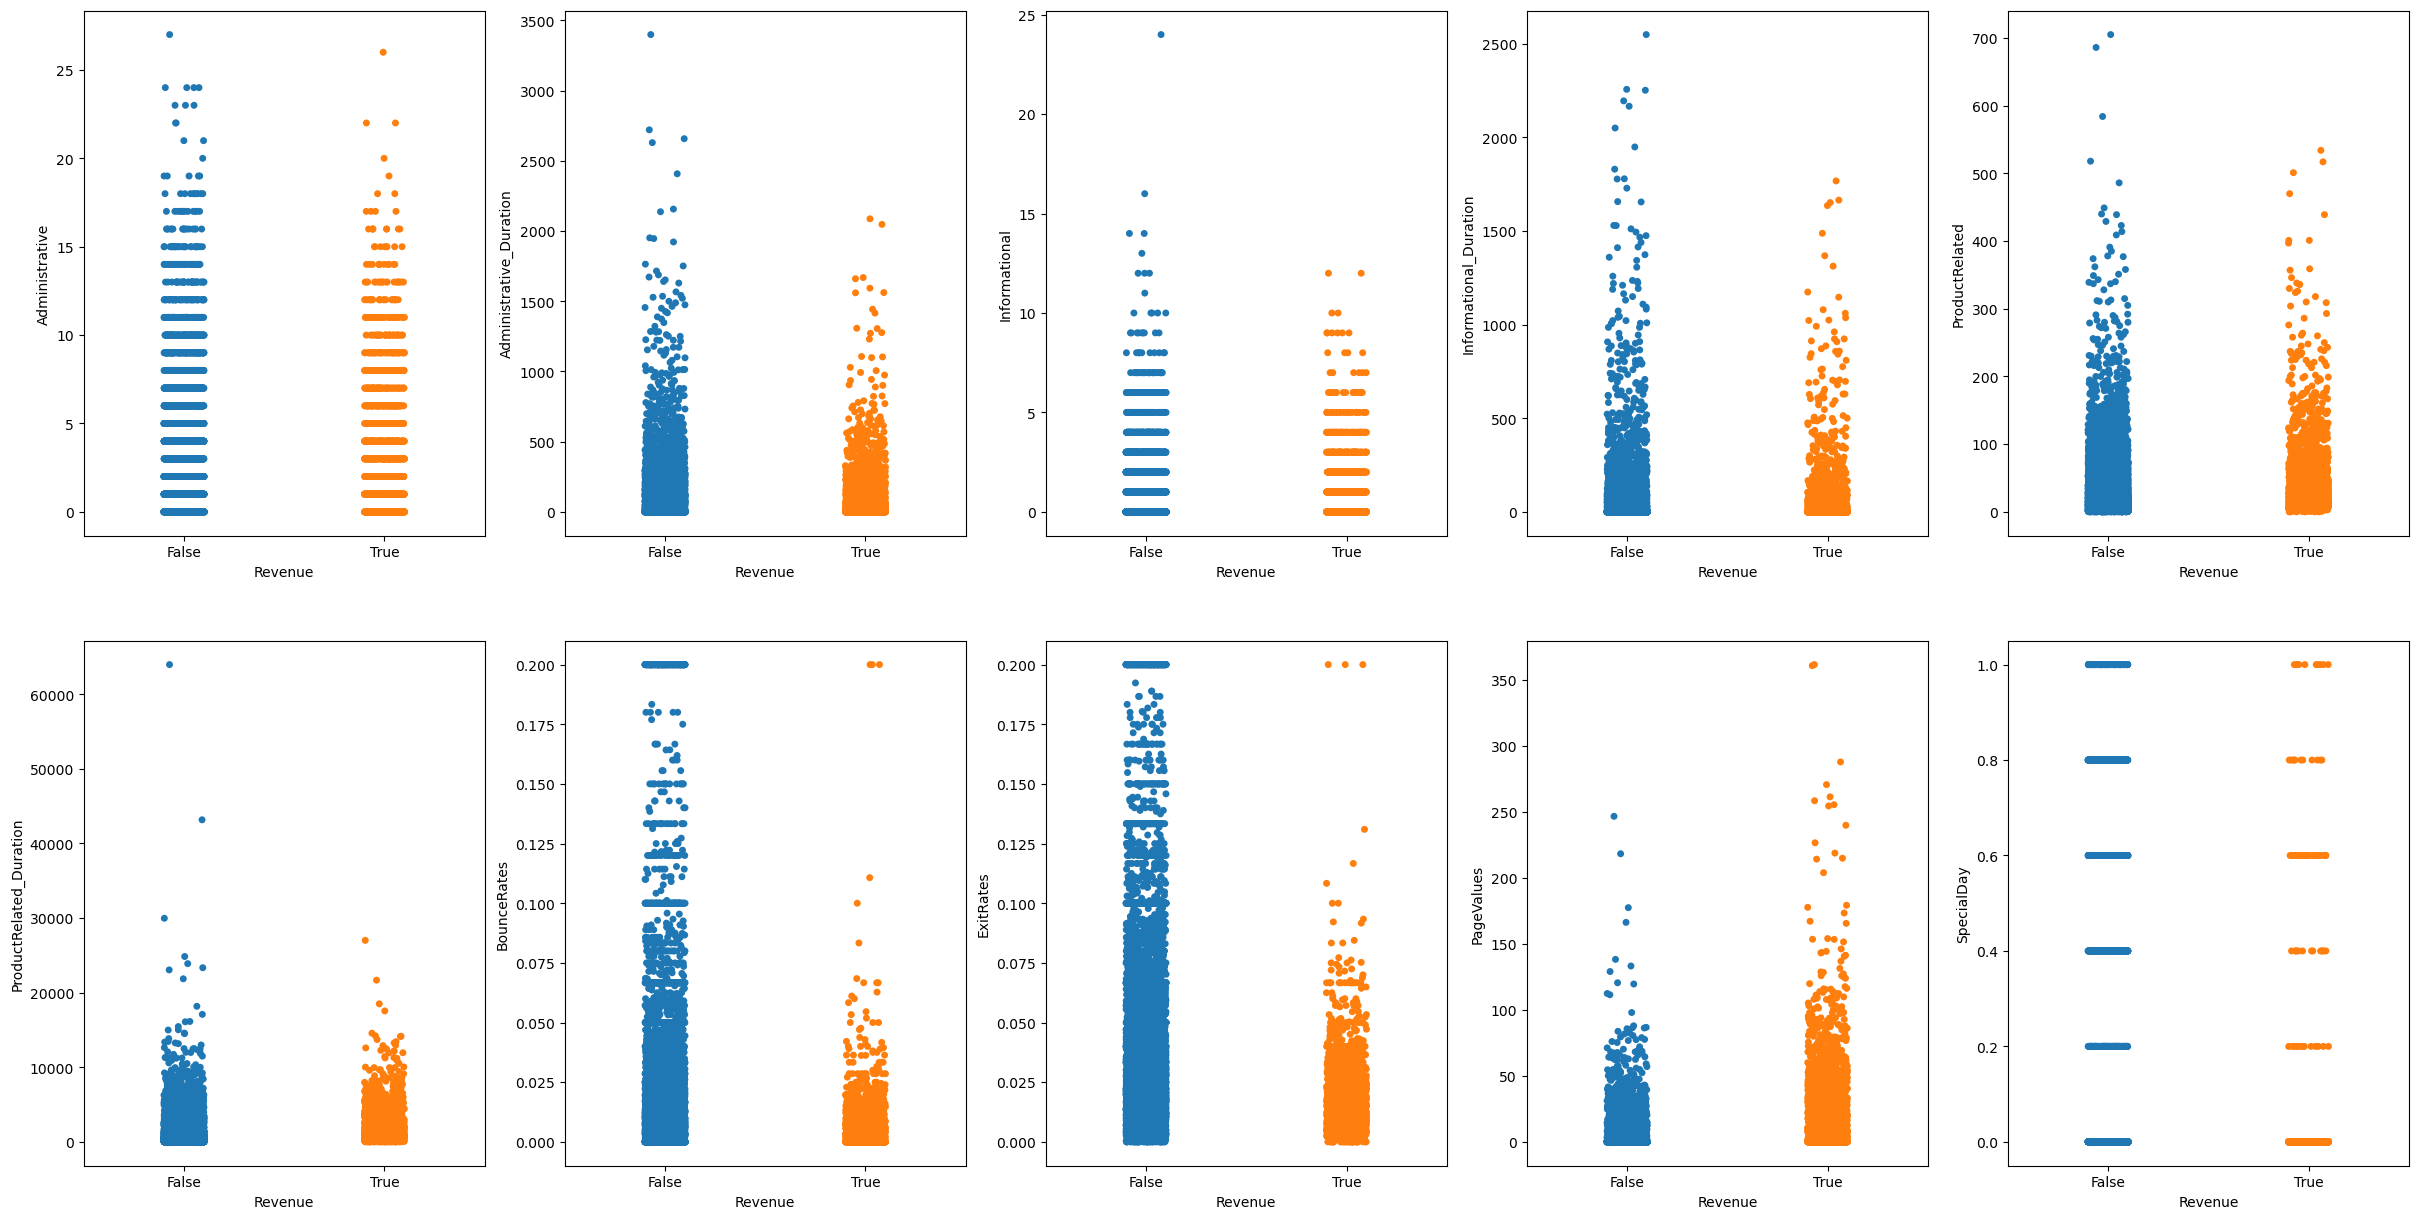

In [25]:
fig, ax = plt.subplots(2,5,figsize=(30,15))
sns.stripplot(ax=ax[0,0], data=df, x='Revenue', y='Administrative')
sns.stripplot(ax=ax[0,1], data=df, x='Revenue', y='Administrative_Duration')
sns.stripplot(ax=ax[0,2], data=df, x='Revenue', y='Informational')
sns.stripplot(ax=ax[0,3], data=df, x='Revenue', y='Informational_Duration')
sns.stripplot(ax=ax[0,4], data=df, x='Revenue', y='ProductRelated')
sns.stripplot(ax=ax[1,0], data=df, x='Revenue', y='ProductRelated_Duration')
sns.stripplot(ax=ax[1,1], data=df, x='Revenue', y='BounceRates')
sns.stripplot(ax=ax[1,2], data=df, x='Revenue', y='ExitRates')
sns.stripplot(ax=ax[1,3], data=df, x='Revenue', y='PageValues')
sns.stripplot(ax=ax[1,4], data=df, x='Revenue', y='SpecialDay')

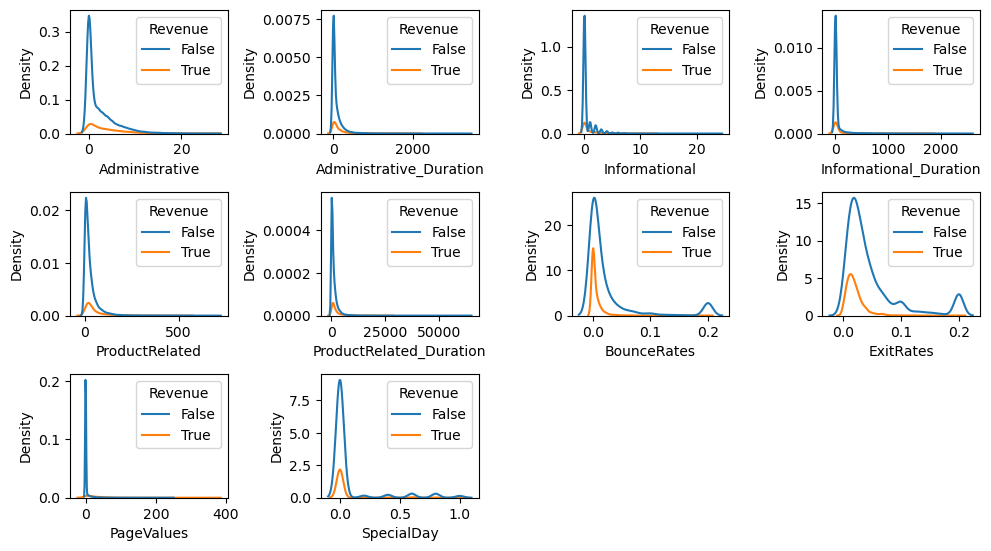

In [26]:
plt.style.use('default')
f = numerical
plt.figure(figsize=(10,7))

for i in range(0, len(f)):
    plt.subplot(4,4,i+1)
    sns.kdeplot(x=f[i],hue = 'Revenue',data=df)
    plt.tight_layout()

<AxesSubplot:>

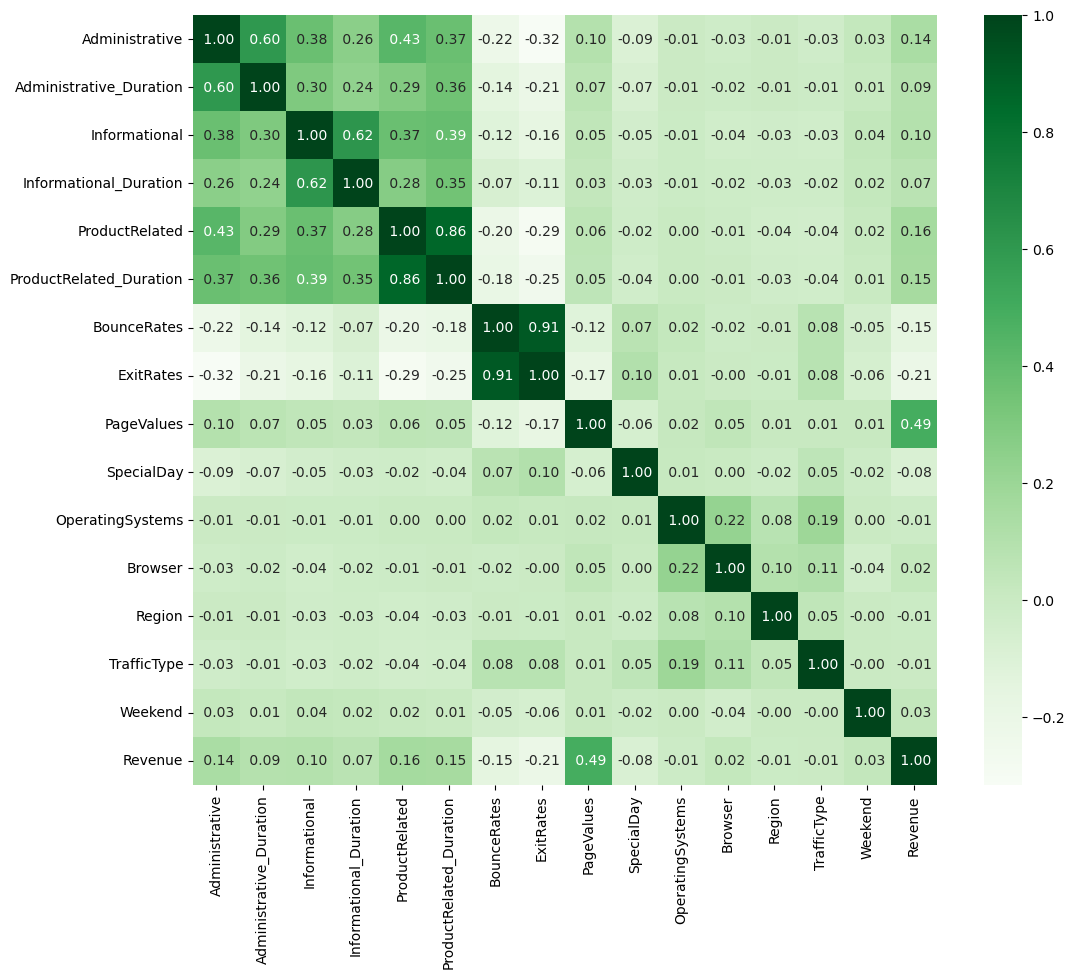

In [27]:
# Kolom Numerical

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap="Greens", annot=True, fmt=' .2f')

In [28]:
#merubah kolom Weekend menjadi binomial agar bisa dibuat pairplot
df['weekend'] = np.where(df['Weekend'] == True, 1,0)
#menghapus kolom Weekend yang lama
df_copy = df.drop(['Weekend'] , axis=1)
df_copy.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Revenue,weekend
2162,0,0.00,0,0.00,5,829.50,0.00,0.04,0.00,0.00,May,2,2,3,2,Returning_Visitor,False,1
9986,3,84.25,0,0.00,52,"1,725.97",0.00,0.03,0.00,0.00,Nov,2,2,1,2,New_Visitor,False,0
1768,0,0.00,0,0.00,24,727.50,0.00,0.02,0.00,0.00,Mar,2,2,3,1,Returning_Visitor,False,0
3025,2,21.00,0,0.00,27,694.00,0.01,0.01,0.00,0.80,May,2,2,1,2,Returning_Visitor,False,0
11699,4,101.75,2,65.50,37,"1,307.47",0.01,0.03,0.00,0.00,Nov,3,2,3,2,Returning_Visitor,False,0


In [29]:
#membuat pair plot
#plt.figure(figsize=(15, 15))
#sns.pairplot(df_copy, diag_kind='kde', hue = 'Revenue')

## Insight

1.Visitor terbanyak ada pada bulan Mei, tetapi transaksi terbanyak ada pada bulan November, sehingga perlu dilakukan campaign pada bulan Mei dan November.

2.Returning type paling banyak melakukan transaksi adalah type returning visitor. Pengunjung dengan tipe Returning sebaiknya diberikan campaign produk-produk yang menarik.

3.Non-weekend lebih banyak dilakukan transaksi dibanding weekend. 

4.Jumlah returning visitor mencapai 10.4K, ini lebih banyak dibandingkan dengan new visitor yang jumlahnya hanya 1.9K sementara persentase dari pengunjung yang melakukan transaksi hanya 15.5% dari seluruh pengunjung toko online.

5.Nilai pagevalues yang tinggi mempunyai peluang untuk melakukan transaksi.

6.Pengunjung dengan Bouncerates dan Exitrates yang tinggi cenderung tidak melakukan transaksi atau False.


# Preprocessing

## Drop Feature yang tidak relevan

In [30]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [31]:
df_copy = df_copy.drop(columns=['ProductRelated_Duration','BounceRates','OperatingSystems',
                       'Browser','Region','TrafficType'], axis=1)
df_copy.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ExitRates,PageValues,SpecialDay,Month,VisitorType,Revenue,weekend
0,0,0.00,0,0.00,1,0.20,0.00,0.00,Feb,Returning_Visitor,False,0
1,0,0.00,0,0.00,2,0.10,0.00,0.00,Feb,Returning_Visitor,False,0
2,0,0.00,0,0.00,1,0.20,0.00,0.00,Feb,Returning_Visitor,False,0
3,0,0.00,0,0.00,2,0.14,0.00,0.00,Feb,Returning_Visitor,False,0
4,0,0.00,0,0.00,10,0.05,0.00,0.00,Feb,Returning_Visitor,False,1


In [32]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ExitRates                12330 non-null  float64
 6   PageValues               12330 non-null  float64
 7   SpecialDay               12330 non-null  float64
 8   Month                    12330 non-null  object 
 9   VisitorType              12330 non-null  object 
 10  Revenue                  12330 non-null  bool   
 11  weekend                  12330 non-null  int32  
dtypes: bool(1), float64(5), int32(1), int64(3), object(2)
memory usage: 1023.6+ KB


## Missing Value

In [33]:
df_copy.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
VisitorType                0
Revenue                    0
weekend                    0
dtype: int64

## Duplicate

In [34]:
df_copy.duplicated(keep=False).sum()

2029

In [35]:
df_copy = df_copy.drop_duplicates(keep='first')
df_copy.duplicated().sum()

0

## Outlier

In [36]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10749 entries, 0 to 12328
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           10749 non-null  int64  
 1   Administrative_Duration  10749 non-null  float64
 2   Informational            10749 non-null  int64  
 3   Informational_Duration   10749 non-null  float64
 4   ProductRelated           10749 non-null  int64  
 5   ExitRates                10749 non-null  float64
 6   PageValues               10749 non-null  float64
 7   SpecialDay               10749 non-null  float64
 8   Month                    10749 non-null  object 
 9   VisitorType              10749 non-null  object 
 10  Revenue                  10749 non-null  bool   
 11  weekend                  10749 non-null  int32  
dtypes: bool(1), float64(5), int32(1), int64(3), object(2)
memory usage: 976.2+ KB


In [37]:
# Mengelompokkan fitur
num = ['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated', 
         'ExitRates']
cat = ['Month', 'VisitorType', 'weekend']
target = 'Revenue'

In [38]:
for i in num:
    Q1 = df_copy[i].quantile(0.25)
    Q3 = df_copy[i].quantile(0.75)
    IQR = Q3-Q1
    low_limit = Q1 - (1.5*IQR)
    high_limit = Q3 + (1.5*IQR)
    
    filter = ((df_copy[i] >= low_limit) & (df_copy[i] <= high_limit))
df_copy_fil = df_copy[filter]
df_copy_fil.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ExitRates,PageValues,SpecialDay,weekend
count,"9,971.00","9,971.00","9,971.00","9,971.00","9,971.00","9,971.00","9,971.00","9,971.00","9,971.00"
mean,2.84,98.86,0.62,42.19,37.98,0.03,7.27,0.06,0.25
std,3.48,190.68,1.38,154.22,47.25,0.02,20.40,0.19,0.43
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,12.00,0.01,0.00,0.00,0.00
50%,2.00,34.40,0.00,0.00,23.00,0.02,0.00,0.00,0.00
75%,4.00,118.78,1.00,0.00,45.00,0.03,2.70,0.00,0.00
max,27.00,"3,398.75",24.00,"2,549.38",705.00,0.08,361.76,1.00,1.00


## Drop Baris Nilai Other pada kolom VisitorType

In [39]:
df_copy_fil['VisitorType'].value_counts(normalize=True)

Returning_Visitor   0.83
New_Visitor         0.16
Other               0.01
Name: VisitorType, dtype: float64

In [40]:
index_other = df_copy_fil[df_copy_fil['VisitorType']=='Other'].index
df_copy2 = df_copy_fil.drop(index_other, axis=0).reset_index(drop=True)
df_copy2.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ExitRates,PageValues,SpecialDay,weekend
count,"9,914.00","9,914.00","9,914.00","9,914.00","9,914.00","9,914.00","9,914.00","9,914.00","9,914.00"
mean,2.85,98.89,0.62,42.33,38.10,0.03,7.16,0.06,0.25
std,3.49,190.34,1.39,154.55,47.30,0.02,19.84,0.19,0.43
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,12.00,0.01,0.00,0.00,0.00
50%,2.00,34.42,0.00,0.00,23.00,0.02,0.00,0.00,0.00
75%,4.00,119.00,1.00,0.00,45.00,0.03,2.68,0.00,0.00
max,27.00,"3,398.75",24.00,"2,549.38",705.00,0.08,361.76,1.00,1.00


## Memisahkan Data Feature dan Data Target

In [41]:
df_feature = df_copy2.drop('Revenue', axis=1)

In [42]:
df_target = df_copy2['Revenue']

In [43]:
df_feature.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ExitRates,PageValues,SpecialDay,Month,VisitorType,weekend
0,0,0.00,0,0.00,10,0.05,0.00,0.00,Feb,Returning_Visitor,1
1,0,0.00,0,0.00,19,0.02,0.00,0.00,Feb,Returning_Visitor,0


In [44]:
df_target.head(2)

0    False
1    False
Name: Revenue, dtype: bool

## Merubah Tipe Data

In [45]:
df_feature['weekend'] = df_feature['weekend'].astype('int')

## Feature Transformation

In [46]:
df_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           9914 non-null   int64  
 1   Administrative_Duration  9914 non-null   float64
 2   Informational            9914 non-null   int64  
 3   Informational_Duration   9914 non-null   float64
 4   ProductRelated           9914 non-null   int64  
 5   ExitRates                9914 non-null   float64
 6   PageValues               9914 non-null   float64
 7   SpecialDay               9914 non-null   float64
 8   Month                    9914 non-null   object 
 9   VisitorType              9914 non-null   object 
 10  weekend                  9914 non-null   int32  
dtypes: float64(5), int32(1), int64(3), object(2)
memory usage: 813.4+ KB


In [47]:
df_feature.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ExitRates', 'PageValues',
       'SpecialDay', 'Month', 'VisitorType', 'weekend'],
      dtype='object')

In [48]:
# Melihat skewness data

skewness = pd.DataFrame({'skewness': np.abs(df_feature.skew())})
print(skewness)

                         skewness
Administrative               1.71
Administrative_Duration      5.20
Informational                3.61
Informational_Duration       6.85
ProductRelated               4.12
ExitRates                    1.01
PageValues                   5.51
SpecialDay                   3.50
weekend                      1.16


Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


In [49]:
# Karena data masih skew, dilakukan log transformation

for col in num:
    df_feature[col] = np.log(df_feature[col] + 1)
    
skew = pd.DataFrame({'skew' : np.abs(df_feature.skew())})
print(skew)

                         skew
Administrative           0.25
Administrative_Duration  0.13
Informational            1.71
Informational_Duration   1.59
ProductRelated           0.08
ExitRates                0.97
PageValues               5.51
SpecialDay               3.50
weekend                  1.16


Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


In [50]:
df_feature.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ExitRates,PageValues,SpecialDay,weekend
count,"9,914.00","9,914.00","9,914.00","9,914.00","9,914.00","9,914.00","9,914.00","9,914.00","9,914.00"
mean,0.97,2.82,0.29,1.04,3.21,0.02,7.16,0.06,0.25
std,0.86,2.32,0.54,1.96,0.95,0.02,19.84,0.19,0.43
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,2.56,0.01,0.00,0.00,0.00
50%,1.10,3.57,0.00,0.00,3.18,0.02,0.00,0.00,0.00
75%,1.61,4.79,0.69,0.00,3.83,0.03,2.68,0.00,0.00
max,3.33,8.13,3.22,7.84,6.56,0.08,361.76,1.00,1.00


In [51]:
# Dikakukan StandardScaler 
from sklearn.preprocessing import MinMaxScaler, StandardScaler

for col in num:
  df_feature[col] = StandardScaler().fit_transform(df_feature[col].values.reshape(len(df_feature),1))

df_feature.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ExitRates,PageValues,SpecialDay,weekend
count,"9,914.00","9,914.00","9,914.00","9,914.00","9,914.00","9,914.00","9,914.00","9,914.00","9,914.00"
mean,-0.00,-0.00,0.00,-0.00,0.00,-0.00,7.16,0.06,0.25
std,1.00,1.00,1.00,1.00,1.00,1.00,19.84,0.19,0.43
min,-1.13,-1.21,-0.54,-0.53,-3.39,-1.47,0.00,0.00,0.00
25%,-1.13,-1.21,-0.54,-0.53,-0.68,-0.74,0.00,0.00,0.00
50%,0.14,0.32,-0.54,-0.53,-0.03,-0.23,0.00,0.00,0.00
75%,0.74,0.85,0.75,-0.53,0.65,0.51,2.68,0.00,0.00
max,2.73,2.28,5.47,3.46,3.54,3.12,361.76,1.00,1.00


## Encoding

In [52]:
# Label Encoding Kolom VisitorType

In [53]:
df_feature['VisitorType'].unique()

array(['Returning_Visitor', 'New_Visitor'], dtype=object)

In [54]:
mapping_visitortype = {'Returning_Visitor':1, 'New_Visitor':0}
df_feature['VisitorType'] = df_feature['VisitorType'].map(mapping_visitortype)
df_feature.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ExitRates,PageValues,SpecialDay,Month,VisitorType,weekend
0,-1.13,-1.21,-0.54,-0.53,-0.86,1.43,0.00,0.00,Feb,1,1
1,-1.13,-1.21,-0.54,-0.53,-0.23,-0.03,0.00,0.00,Feb,1,0
2,-1.13,-1.21,-0.54,-0.53,-1.93,-0.17,0.00,0.40,Feb,1,0


In [55]:
# Label Encoding Kolom Month

In [56]:
df_feature['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [57]:
mapping_month = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'June':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10,'Nov':11,'Dec':12}
df_feature['Month'] = df_feature['Month'].map(mapping_month)
df_feature.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ExitRates,PageValues,SpecialDay,Month,VisitorType,weekend
0,-1.13,-1.21,-0.54,-0.53,-0.86,1.43,0.00,0.00,2,1,1
1,-1.13,-1.21,-0.54,-0.53,-0.23,-0.03,0.00,0.00,2,1,0
2,-1.13,-1.21,-0.54,-0.53,-1.93,-0.17,0.00,0.40,2,1,0


In [58]:
df_feature.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
VisitorType                0
weekend                    0
dtype: int64

In [59]:
df_feature['Month'].value_counts()

5     2595
11    2532
3     1389
12    1381
10     519
9      415
8      381
7      367
6      219
2      116
Name: Month, dtype: int64

In [60]:
df_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           9914 non-null   float64
 1   Administrative_Duration  9914 non-null   float64
 2   Informational            9914 non-null   float64
 3   Informational_Duration   9914 non-null   float64
 4   ProductRelated           9914 non-null   float64
 5   ExitRates                9914 non-null   float64
 6   PageValues               9914 non-null   float64
 7   SpecialDay               9914 non-null   float64
 8   Month                    9914 non-null   int64  
 9   VisitorType              9914 non-null   int64  
 10  weekend                  9914 non-null   int32  
dtypes: float64(8), int32(1), int64(2)
memory usage: 813.4 KB


## Train Test Split

In [61]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(df_feature, df_target, test_size=0.2, random_state=42)

## Class Imbalance

In [62]:
from imblearn import under_sampling, over_sampling
Xtrain_oversampling, ytrain_oversampling = over_sampling.SMOTE().fit_resample(Xtrain, ytrain)

In [63]:
ytrain_oversampling.value_counts()

False    6420
True     6420
Name: Revenue, dtype: int64

In [64]:
Xtrain_oversampling.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ExitRates,PageValues,SpecialDay,Month,VisitorType,weekend
0,-1.13,-1.21,-0.54,-0.53,0.72,1.13,0.00,0.00,7,1,0
1,-0.33,0.00,-0.54,-0.53,0.63,-1.34,32.81,0.00,11,1,0
2,0.48,1.00,-0.54,-0.53,0.82,-1.25,0.00,0.00,3,1,1
3,-1.13,-1.21,-0.54,-0.53,-0.86,-0.17,63.59,0.00,3,0,1
4,-1.13,-1.21,-0.54,-0.53,-0.96,-0.63,0.00,0.00,11,1,0


In [65]:
Xtest.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ExitRates,PageValues,SpecialDay,Month,VisitorType,weekend
2833,0.95,0.64,0.75,-0.53,1.24,1.94,2.39,0.00,5,1,0
8312,-1.13,-1.21,-0.54,-0.53,-1.50,3.11,0.00,0.00,12,0,0
360,-1.13,-1.21,-0.54,-0.53,-1.07,1.43,0.00,0.00,3,1,0
1261,-1.13,-1.21,-0.54,-0.53,0.45,-0.99,0.00,0.00,3,1,1
3037,1.28,0.96,-0.54,-0.53,0.30,-0.80,6.59,0.00,5,0,0


# Modeling

## Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_score, f1_score, recall_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_validate

In [67]:
def evaluation(model):
    y_pred = model.predict(Xtest)
    y_pred_train = model.predict(Xtrain_oversampling)
    y_pred_proba = model.predict_proba(Xtest)
    y_pred_proba_train = model.predict_proba(Xtrain_oversampling)
    
    print('Classification Report:\n', classification_report(ytest, y_pred))
    print('Confusion Matrix:\n', confusion_matrix(ytest, y_pred))
    print('Precision Score:\n', precision_score(ytest, y_pred))
    print('Recall Score:\n', recall_score(ytest, y_pred))
    print('f1 Score:\n', f1_score(ytest, y_pred))
    print('\n')
    print('Accuracy Test:\n', accuracy_score(ytest, y_pred))
    print('Accuracy Train:\n', accuracy_score(ytrain_oversampling, y_pred_train))
    print('\n')
    print('AUC Score Test:\n', roc_auc_score(ytest, y_pred_proba[:,1]))
    print('AUC Score Train:\n', roc_auc_score(ytrain_oversampling, y_pred_proba_train[:,1]))
    
    score = cross_validate(model, df_feature, df_target, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc(crossval train):'+ str(score['train_score'].mean()))
    print('roc_auc(crossval test):'+ str(score['test_score'].mean()))

In [68]:
model_lr = LogisticRegression(solver='newton-cg',C=0.00075) #'newton-cg','sag', 'saga'
model_lr.fit(Xtrain_oversampling, ytrain_oversampling)
evaluation(model_lr)

Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.90      0.91      1620
        True       0.60      0.66      0.63       363

    accuracy                           0.86      1983
   macro avg       0.76      0.78      0.77      1983
weighted avg       0.86      0.86      0.86      1983

Confusion Matrix:
 [[1459  161]
 [ 124  239]]
Precision Score:
 0.5975
Recall Score:
 0.6584022038567493
f1 Score:
 0.6264744429882044


Accuracy Test:
 0.8562783661119516
Accuracy Train:
 0.7965732087227414


AUC Score Test:
 0.868737883889399
AUC Score Train:
 0.8848468449452159
roc_auc(crossval train):0.8818676648583853
roc_auc(crossval test):0.8709938963826145


In [69]:
y_pred = model_lr.predict(Xtest)
y_pred

array([False, False, False, ..., False,  True, False])

In [70]:
model_lr.intercept_

array([-1.87520559])

In [71]:
model_lr.coef_

array([[ 0.04434989,  0.00313441,  0.07581055,  0.04067573,  0.16534237,
        -0.10771864,  0.10741714, -0.02954957,  0.12070295, -0.10498602,
        -0.10515379]])

In [72]:
# Tuning Hyperparameter

In [73]:
from sklearn.model_selection import RandomizedSearchCV

p = ['l2']
c = [float(x) for x in np.linspace(0.0001, 0.001, 100)]
hyperparameters = dict(penalty=p, C=c)

rs_lr = RandomizedSearchCV(model_lr, hyperparameters, scoring='roc_auc', random_state=42, cv=5)
rs_lr.fit(Xtrain_oversampling, ytrain_oversampling)
evaluation(rs_lr)


Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.91      0.91      1620
        True       0.62      0.62      0.62       363

    accuracy                           0.86      1983
   macro avg       0.77      0.77      0.77      1983
weighted avg       0.86      0.86      0.86      1983

Confusion Matrix:
 [[1480  140]
 [ 137  226]]
Precision Score:
 0.6174863387978142
Recall Score:
 0.6225895316804407
f1 Score:
 0.6200274348422498


Accuracy Test:
 0.8603126575895108
Accuracy Train:
 0.7888629283489097


AUC Score Test:
 0.8753902662993572
AUC Score Train:
 0.8872688662765306
roc_auc(crossval train):0.8884557976738499
roc_auc(crossval test):0.8752269273064268


In [74]:
# Analyzing Learning Curve

param values: 0.00068; train: 0.8849037155113014; test: 0.8690983913206134
param values: 0.0006807070707070707; train: 0.8849010224085558; test: 0.8690779852396014
param values: 0.0006814141414141414; train: 0.8849003188051356; test: 0.8690728837193484
param values: 0.0006821212121212121; train: 0.8849034243650585; test: 0.8690762847328504
param values: 0.0006828282828282828; train: 0.8849031089566289; test: 0.8690779852396013
param values: 0.0006835353535353535; train: 0.8849045161634689; test: 0.8690762847328504
param values: 0.0006842424242424243; train: 0.8849042007550394; test: 0.8690745842260994
param values: 0.000684949494949495; train: 0.8849009253598084; test: 0.8690592796653401
param values: 0.0006856565656565657; train: 0.8849012650304248; test: 0.8690575791585893
param values: 0.0006863636363636364; train: 0.8849014106035462; test: 0.8690592796653402
param values: 0.0006870707070707071; train: 0.8849016532254153; test: 0.8690541781450872
param values: 0.0006877777777777778;

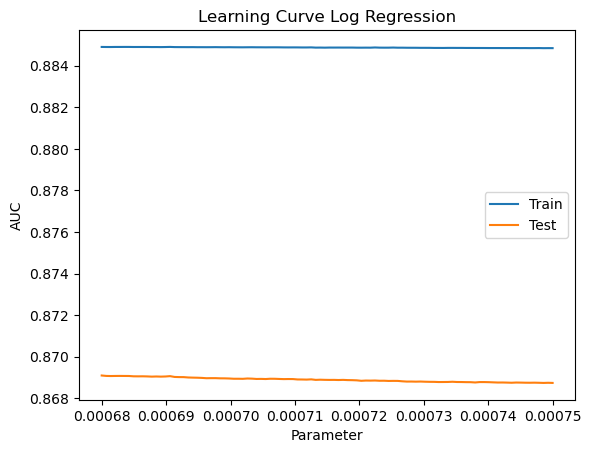

In [75]:
def draw_learningcurve(param_values):
    train_scores = []
    test_scores = []
    
    for i in param_values:
        model_lr = LogisticRegression(penalty='l2', C=i)
        model_lr.fit(Xtrain_oversampling, ytrain_oversampling)
        
        #eval on train
        y_pred_train_proba = model_lr.predict_proba(Xtrain_oversampling)
        train_eval = roc_auc_score(ytrain_oversampling, y_pred_train_proba[:,1])
        train_scores.append(train_eval)
        
        #eval on test
        y_pred_proba = model_lr.predict_proba(Xtest)
        test_eval = roc_auc_score(ytest, y_pred_proba[:,1])
        test_scores.append(test_eval)
        
        print('param values: ' + str(i) + '; train: ' + str(train_eval) + '; test: '+ str(test_eval))
        
    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('Parameter')
    plt.ylabel('AUC')
    plt.title('Learning Curve Log Regression')
    plt.legend()
    plt.show()
    
param_values = [float(x) for x in np.linspace(0.00068, 0.00075, 100)]
draw_learningcurve(param_values)

## KNN

In [76]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier().fit(Xtrain_oversampling, ytrain_oversampling)
evaluation(model_knn)

Classification Report:
               precision    recall  f1-score   support

       False       0.94      0.81      0.87      1620
        True       0.48      0.78      0.60       363

    accuracy                           0.81      1983
   macro avg       0.71      0.80      0.73      1983
weighted avg       0.86      0.81      0.82      1983

Confusion Matrix:
 [[1319  301]
 [  81  282]]
Precision Score:
 0.483704974271012
Recall Score:
 0.7768595041322314
f1 Score:
 0.5961945031712473


Accuracy Test:
 0.8073625819465456
Accuracy Train:
 0.9130841121495327


AUC Score Test:
 0.8516801006699997
AUC Score Train:
 0.9864298798536505
roc_auc(crossval train):0.9527466872884853
roc_auc(crossval test):0.8445169251780313


In [77]:
# Tuning Hyperparameter

In [78]:
from sklearn.model_selection import RandomizedSearchCV

n_neighbors = [int(x) for x in np.linspace(175, 100, 25)]
weights = ['uniform','distance']
p = [1,2,3]
hyperparameters = dict(n_neighbors=n_neighbors, weights=weights, p=p)

rs_knn = RandomizedSearchCV(model_knn, hyperparameters, scoring='roc_auc', random_state=1, cv=5)
rs_knn.fit(Xtrain_oversampling, ytrain_oversampling)
evaluation(rs_knn)

Classification Report:
               precision    recall  f1-score   support

       False       0.96      0.81      0.88      1620
        True       0.50      0.84      0.63       363

    accuracy                           0.82      1983
   macro avg       0.73      0.83      0.75      1983
weighted avg       0.87      0.82      0.83      1983

Confusion Matrix:
 [[1318  302]
 [  59  304]]
Precision Score:
 0.5016501650165016
Recall Score:
 0.837465564738292
f1 Score:
 0.627450980392157


Accuracy Test:
 0.8179525970751387
Accuracy Train:
 0.9992990654205608


AUC Score Test:
 0.8986030337040439
AUC Score Train:
 0.9999989445948699
roc_auc(crossval train):0.9134244395379121
roc_auc(crossval test):0.8917176980516313


In [79]:
# Analyzing Learning Curve

param values: 175; train: 0.9170051848293397; test: 0.898415127708057
param values: 176; train: 0.9169618768257295; test: 0.89857157432915
param values: 177; train: 0.9169031502023466; test: 0.8985044043124852
param values: 178; train: 0.9168470438951485; test: 0.8983819678264122
param values: 179; train: 0.9168057496530506; test: 0.8982127674046866
param values: 180; train: 0.9167342368571734; test: 0.8983692140257797
param values: 181; train: 0.9166900190215546; test: 0.8983301023705064
param values: 182; train: 0.9166329422268806; test: 0.8984210794816856
param values: 183; train: 0.9165755014994031; test: 0.8985690235690236
param values: 184; train: 0.9164615905319242; test: 0.8984712444308405
param values: 185; train: 0.9164190467872012; test: 0.8983998231472978
param values: 186; train: 0.9163424025387953; test: 0.8982918409686087
param values: 187; train: 0.9162208732446308; test: 0.8981872598034215
param values: 188; train: 0.9161349244475501; test: 0.8980461177430874
param val

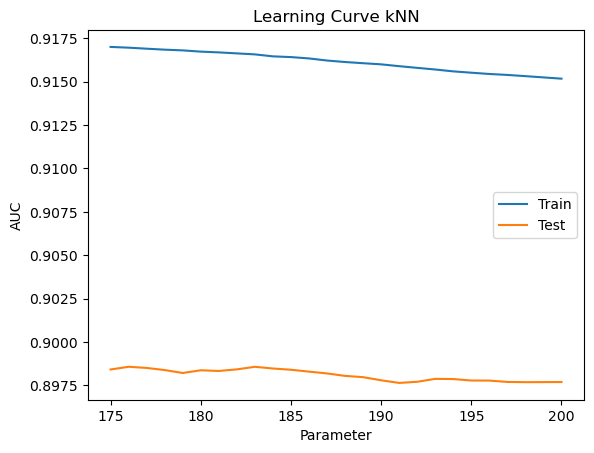

In [80]:
def draw_learningcurve(param_values):
    train_scores = []
    test_scores = []
    
    for i in param_values:
        model_knn = KNeighborsClassifier(n_neighbors=i)
        model_knn.fit(Xtrain_oversampling, ytrain_oversampling)
        
        #eval on train
        y_pred_train_proba = model_knn.predict_proba(Xtrain_oversampling)
        train_eval = roc_auc_score(ytrain_oversampling, y_pred_train_proba[:,1])
        train_scores.append(train_eval)
        
        #eval on test
        y_pred_proba = model_knn.predict_proba(Xtest)
        test_eval = roc_auc_score(ytest, y_pred_proba[:,1])
        test_scores.append(test_eval)
        
        print('param values: ' + str(i) + '; train: ' + str(train_eval) + '; test: '+ str(test_eval))
        
    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('Parameter')
    plt.ylabel('AUC')
    plt.title('Learning Curve kNN')
    plt.legend()
    plt.show()
    
param_values = [int(x) for x in np.linspace(175, 200, 25)]
draw_learningcurve(param_values)

## Decision Tree

In [81]:
from sklearn.tree import DecisionTreeClassifier
model_dtree = DecisionTreeClassifier(max_depth=4, criterion='gini')
model_dtree.fit(Xtrain_oversampling, ytrain_oversampling)
evaluation(model_dtree)

Classification Report:
               precision    recall  f1-score   support

       False       0.94      0.87      0.91      1620
        True       0.57      0.74      0.64       363

    accuracy                           0.85      1983
   macro avg       0.75      0.81      0.77      1983
weighted avg       0.87      0.85      0.86      1983

Confusion Matrix:
 [[1417  203]
 [  94  269]]
Precision Score:
 0.5699152542372882
Recall Score:
 0.7410468319559229
f1 Score:
 0.644311377245509


Accuracy Test:
 0.8502269288956127
Accuracy Train:
 0.8390965732087228


AUC Score Test:
 0.8927413869333062
AUC Score Train:
 0.9149846905600684
roc_auc(crossval train):0.9061469990634995
roc_auc(crossval test):0.8729091835829763


In [82]:
# Tuning Hyperparameter

In [83]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

max_depth = [int(x) for x in np.linspace(1,110, num=30)]
min_samples_split = [2,5,10,100]
min_samples_leaf = [1,2,4,10,20,50]
max_features = ['auto','sqrt']
criterion = ['gini','entropy']
splitter = ['best','random']
hyperparameters = dict(max_depth = max_depth, min_samples_split = min_samples_split,
                      min_samples_leaf = min_samples_leaf, max_features=max_features,
                      criterion=criterion, splitter=splitter)

modell_dtree = DecisionTreeClassifier(random_state=42)
rs_dtree = RandomizedSearchCV(modell_dtree, hyperparameters, scoring='roc_auc', cv=5)
rs_dtree.fit(Xtrain_oversampling, ytrain_oversampling)
evaluation(rs_dtree)

Classification Report:
               precision    recall  f1-score   support

       False       0.94      0.84      0.89      1620
        True       0.51      0.75      0.61       363

    accuracy                           0.82      1983
   macro avg       0.73      0.80      0.75      1983
weighted avg       0.86      0.82      0.84      1983

Confusion Matrix:
 [[1360  260]
 [  89  274]]
Precision Score:
 0.5131086142322098
Recall Score:
 0.7548209366391184
f1 Score:
 0.6109253065774806


Accuracy Test:
 0.8240040342914775
Accuracy Train:
 0.8753894080996885


AUC Score Test:
 0.8826080672040267
AUC Score Train:
 0.9556704612726973
roc_auc(crossval train):0.921138515747646
roc_auc(crossval test):0.8727499020051258


In [84]:
# Analyzing Learning Curve

param values: 1; train: 0.8330218068535825; test: 0.8204826038159371
param values: 1; train: 0.8330218068535825; test: 0.8204826038159371
param values: 1; train: 0.8330218068535825; test: 0.8204826038159371
param values: 1; train: 0.8330218068535825; test: 0.8204826038159371
param values: 1; train: 0.8330218068535825; test: 0.8204826038159371
param values: 1; train: 0.8330218068535825; test: 0.8204826038159371
param values: 1; train: 0.8330218068535825; test: 0.8204826038159371
param values: 1; train: 0.8330218068535825; test: 0.8204826038159371
param values: 1; train: 0.8330218068535825; test: 0.8204826038159371
param values: 1; train: 0.8330218068535825; test: 0.8204826038159371
param values: 1; train: 0.8330218068535825; test: 0.8204826038159371
param values: 1; train: 0.8330218068535825; test: 0.8204826038159371
param values: 1; train: 0.8330218068535825; test: 0.8204826038159371
param values: 1; train: 0.8330218068535825; test: 0.8204826038159371
param values: 1; train: 0.83302180

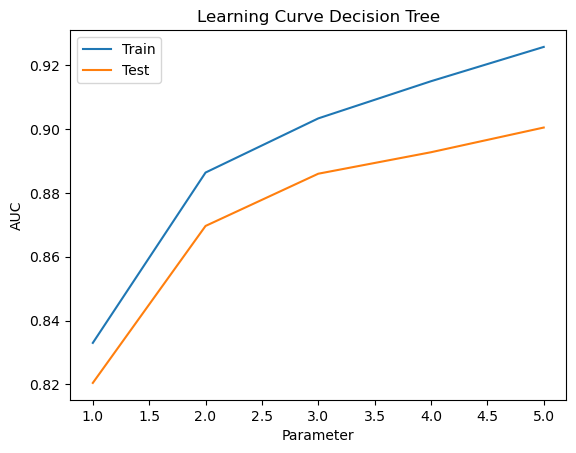

In [85]:
def draw_learningcurve(param_values):
    train_scores = []
    test_scores = []
    
    #param_values = [int(x) for x in np.linspace(2500, 5000, 100)]
    for i in param_values:
        modell_dtree = DecisionTreeClassifier(max_depth=i)
        modell_dtree.fit(Xtrain_oversampling, ytrain_oversampling)
        
        #eval on train
        y_pred_train_proba = modell_dtree.predict_proba(Xtrain_oversampling)
        train_eval = roc_auc_score(ytrain_oversampling, y_pred_train_proba[:,1])
        train_scores.append(train_eval)
        
        #eval on test
        y_pred_proba = modell_dtree.predict_proba(Xtest)
        test_eval = roc_auc_score(ytest, y_pred_proba[:,1])
        test_scores.append(test_eval)
        
        print('param values: ' + str(i) + '; train: ' + str(train_eval) + '; test: '+ str(test_eval))
        
    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('Parameter')
    plt.ylabel('AUC')
    plt.title('Learning Curve Decision Tree')
    plt.legend()
    plt.show()
    
param_values = [int(x) for x in np.linspace(1, 5, 100)]
draw_learningcurve(param_values)

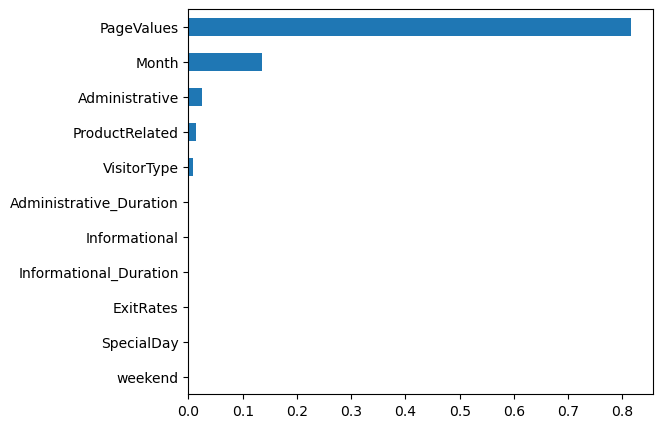

In [86]:
feat_importances = pd.Series(model_dtree.feature_importances_, index=df_feature.columns)
ax = feat_importances.nlargest(25).plot(kind='barh',figsize=(6,5))
ax.invert_yaxis()
    
plt.show()

In [87]:
feat_importances

Administrative            0.02
Administrative_Duration   0.00
Informational             0.00
Informational_Duration    0.00
ProductRelated            0.01
ExitRates                 0.00
PageValues                0.82
SpecialDay                0.00
Month                     0.14
VisitorType               0.01
weekend                   0.00
dtype: float64

## Random Forest

In [88]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=25, max_depth=4, criterion='gini',random_state=42)
model_rf.fit(Xtrain_oversampling, ytrain_oversampling)
evaluation(model_rf)

Classification Report:
               precision    recall  f1-score   support

       False       0.95      0.85      0.90      1620
        True       0.54      0.78      0.64       363

    accuracy                           0.84      1983
   macro avg       0.74      0.82      0.77      1983
weighted avg       0.87      0.84      0.85      1983

Confusion Matrix:
 [[1382  238]
 [  79  284]]
Precision Score:
 0.5440613026819924
Recall Score:
 0.7823691460055097
f1 Score:
 0.6418079096045198


Accuracy Test:
 0.8401412002017146
Accuracy Train:
 0.8407320872274143


AUC Score Test:
 0.8995604190048635
AUC Score Train:
 0.9284051008821731
roc_auc(crossval train):0.9156713563257208
roc_auc(crossval test):0.8819518397318221


In [89]:
# Tuning Hyperparameter

In [90]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

n_estimators = [int(x) for x in np.linspace(23, 25, 2)]
criterion = ['gini','entropy']
max_depth = [int(x) for x in np.linspace(2, 4, 5)]
min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
min_samples_leaf = [int(x) for x in np.linspace(2, 20, 10)]
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

model_rf = RandomForestClassifier(random_state=42)
rs_rf = RandomizedSearchCV(model_rf, hyperparameters, scoring='roc_auc', random_state=1, cv=5)
rs_rf.fit(Xtrain_oversampling, ytrain_oversampling)
evaluation(rs_rf)

Classification Report:
               precision    recall  f1-score   support

       False       0.95      0.85      0.90      1620
        True       0.54      0.79      0.64       363

    accuracy                           0.84      1983
   macro avg       0.74      0.82      0.77      1983
weighted avg       0.87      0.84      0.85      1983

Confusion Matrix:
 [[1380  240]
 [  78  285]]
Precision Score:
 0.5428571428571428
Recall Score:
 0.7851239669421488
f1 Score:
 0.6418918918918919


Accuracy Test:
 0.8396369137670197
Accuracy Train:
 0.8402647975077882


AUC Score Test:
 0.9000901268578037
AUC Score Train:
 0.9278437345328558
roc_auc(crossval train):0.9164780249644041
roc_auc(crossval test):0.8852218940945894


param values: 2; train: 0.9196361035898333; test: 0.8920705370200319
param values: 3; train: 0.9216464683960753; test: 0.8978165493317007
param values: 4; train: 0.9190213240360633; test: 0.8954069312655171


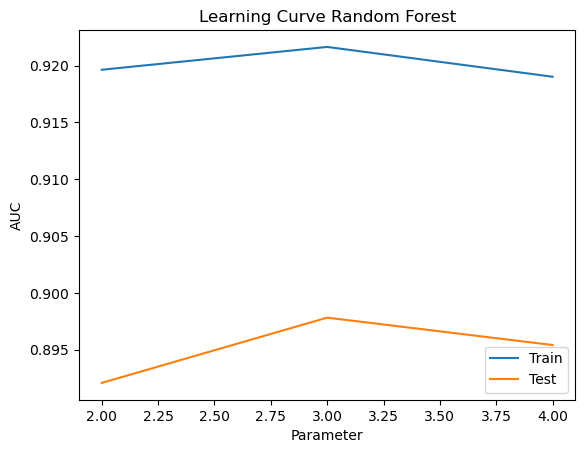

In [91]:
# Learning Curve

#param_values = [int(x) for x in np.linspace(20, 25, 6)] # n_estimator
param_values = [int(x) for x in np.linspace(2, 4, 3)] # max_depth
#param_values = [int(x) for x in np.linspace(2, 50, 15)] # min_samples_split
#param_values = [int(x) for x in np.linspace(2, 50, 15)] # min_samples_leaf

def draw_learningcurve(param_values):
    train_scores = []
    test_scores = []

    for i in param_values:
        modell_rf = RandomForestClassifier(n_estimators=25, max_depth=3,min_samples_leaf=i)
        modell_rf.fit(Xtrain_oversampling, ytrain_oversampling)
        
        #eval on train
        y_pred_train_proba = modell_rf.predict_proba(Xtrain_oversampling)
        train_eval = roc_auc_score(ytrain_oversampling, y_pred_train_proba[:,1])
        train_scores.append(train_eval)
        
        #eval on test
        y_pred_proba = modell_rf.predict_proba(Xtest)
        test_eval = roc_auc_score(ytest, y_pred_proba[:,1])
        test_scores.append(test_eval)
        
        print('param values: ' + str(i) + '; train: ' + str(train_eval) + '; test: '+ str(test_eval))
        
    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('Parameter')
    plt.ylabel('AUC')
    plt.title('Learning Curve Random Forest')
    plt.legend()
    plt.show()
    
draw_learningcurve(param_values)

In [92]:
feat_importances = pd.Series(model_rf.feature_importances_, index=df_feature.columns)
ax = feat_importances.nlargest(25).plot(kind='barh',figsize=(6,5))
ax.invert_yaxis()
    
plt.show()

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
feat_importances.sort_values(ascending=False)

In [ ]:
explainer = shap.TreeExplainer(model_rf)
shap_values = explainer.shap_values(Xtest)
shap.summary_plot(shap_values[1], Xtest)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0], Xtest.iloc[0,:])

1.	Dalam kasus kelompok 7, evaluasi yang cocok digunakan adalah roc_auc (AUC) karena perlu untuk menurunkan nilai False Positif (FP) yaitu menurunkan prediksi bertransaksi tapi kenyataanya tidak melakukan transaksi dan menurunkan False Negatif (FN) yaitu menurunkan prediksi tidak bertransaksi tapi kenyataanya melakukan transaksi.

2.	Dari keempat model Classification yang dicoba diperoleh Model Random Forest dengan Max_Depth adalah 4 dan criterion = gini mempunya hasil roc_auc (AUC) yang paling baik dengan nilai AUC sekitar 0,89 (89%) untuk data test dan (92%) untuk data training

3.	Nilai AUC data training > AUC data test namun perbedaannya sangat kecil sehingga model Random Forest dengan Max_Depth adalah 4 dan gini adalah yang terbaik (AUC paling tinggi, tidak overfitting dan tidak juga underfitting)

4.	Hasil Random Forest terdapat 10 kolom yang memiliki kontribusi terhadap kolom label (revenue) dengan urutan dari yang terbesar yaitu PageValues, ExitRates, Administrative, Month, ProductRelated, VisitorType,Administrative_duration, weekend, SpecialDay,dan Informational
